### Session Creation 

In [1]:
from snowflake.snowpark import Session
from snowflake.snowpark.functions import col


connection_parameters = {
    "account": "<your snowflake account identifier>",
    "user": "<your snowflake username>",
    "password": "<your snowflake password>",
    "role": "<your snowflake role>",
    "warehouse": "<your snowflake warehouse>",  # optional
    "database": "<your snowflake database>",  # optional
    "schema": "<your snowflake schema>" # optional
  }

session = Session.builder.configs(connection_parameters).create()

### Exploring & Preparing Data

* Section covers code snippets to explore the dataset
* Code snippets encompasses  high level data exploration function - top rows, row & column count etc

In [2]:
#Lets Read In The Dataset
df_table = session.table("BSD_TRAINING")

In [5]:
#Shape Of The Dataset
number_of_rows = df_table.count()
number_of_columns = len(df_table.columns)
print("Total No of rows in dataset : ",number_of_rows)
print("Total No of columns in dataset : ",number_of_columns)

Total No of rows in dataset :  10886
Total No of columns in dataset :  12


In [ ]:
#Sample Of First Few Rows
df_table.sample(n=2).show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------
|"SEASON"  |"HOLIDAY"  |"WORKINGDAY"  |"WEATHER"  |"TEMP"  |"ATEMP"  |"HUMIDITY"  |"WINDSPEED"  |"CASUAL"  |"REGISTERED"  |"COUNT"  |"DATETIME"           |
-----------------------------------------------------------------------------------------------------------------------------------------------------------
|4         |0          |1             |1          |21.32   |25.0     |68          |15.0013      |35        |310           |345      |2011-10-04 19:00:00  |
|1         |0          |1             |1          |24.6    |30.305   |64          |15.0013      |34        |296           |330      |2012-03-19 20:00:00  |
-----------------------------------------------------------------------------------------------------------------------------------------------------------



In [10]:
import pprint
data_types = df_table.schema
data_types = df_table.schema.fields
pprint.pprint(data_types)

[StructField('SEASON', LongType(), nullable=True),
 StructField('HOLIDAY', LongType(), nullable=True),
 StructField('WORKINGDAY', LongType(), nullable=True),
 StructField('WEATHER', LongType(), nullable=True),
 StructField('TEMP', DoubleType(), nullable=True),
 StructField('ATEMP', DoubleType(), nullable=True),
 StructField('HUMIDITY', LongType(), nullable=True),
 StructField('WINDSPEED', DoubleType(), nullable=True),
 StructField('CASUAL', LongType(), nullable=True),
 StructField('REGISTERED', LongType(), nullable=True),
 StructField('COUNT', LongType(), nullable=True),
 StructField('DATETIME', TimestampType(tz=ntz), nullable=True)]


### Missing Value Analysis

* Section covers option to explore missing values in each feature

In [ ]:
from snowflake.snowpark.functions import count, col
data_types = df_table.schema
print(data_types)
for column in df_table.columns:
    print(f"Null values in {column} is {number_of_rows - df_table.agg(count(col(column))).collect()[0][0]}")

StructType([StructField('SEASON', LongType(), nullable=True), StructField('HOLIDAY', LongType(), nullable=True), StructField('WORKINGDAY', LongType(), nullable=True), StructField('WEATHER', LongType(), nullable=True), StructField('TEMP', DoubleType(), nullable=True), StructField('ATEMP', DoubleType(), nullable=True), StructField('HUMIDITY', LongType(), nullable=True), StructField('WINDSPEED', DoubleType(), nullable=True), StructField('CASUAL', LongType(), nullable=True), StructField('REGISTERED', LongType(), nullable=True), StructField('COUNT', LongType(), nullable=True), StructField('DATETIME', TimestampType(tz=ntz), nullable=True)])
Null values in SEASON is 0
Null values in HOLIDAY is 0
Null values in WORKINGDAY is 0
Null values in WEATHER is 0
Null values in TEMP is 0
Null values in ATEMP is 0
Null values in HUMIDITY is 0
Null values in WINDSPEED is 0
Null values in CASUAL is 0
Null values in REGISTERED is 0
Null values in COUNT is 0
Null values in DATETIME is 0


### Feature Engineering

* Section encompasses code snippets to create new features from DATETIME Column

In [ ]:
from snowflake.snowpark.functions import hour
df_table = df_table.with_column("hour", hour("DATETIME"))
df_table.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"SEASON"  |"HOLIDAY"  |"WORKINGDAY"  |"WEATHER"  |"TEMP"  |"ATEMP"  |"HUMIDITY"  |"WINDSPEED"  |"CASUAL"  |"REGISTERED"  |"COUNT"  |"DATETIME"           |"HOUR"  |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
|1         |0          |0             |1          |9.84    |14.395   |81          |0.0          |3         |13            |16       |2011-01-01 00:00:00  |0       |
|1         |0          |0             |1          |9.02    |13.635   |80          |0.0          |8         |32            |40       |2011-01-01 01:00:00  |1       |
|1         |0          |0             |1          |9.02    |13.635   |80          |0.0          |5         |27            |32       |2011-01-01 02:00:00  |2       |
|1        

In [ ]:
from snowflake.snowpark.functions import month
df_table = df_table.with_column("month", month("DATETIME"))
df_table.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"SEASON"  |"HOLIDAY"  |"WORKINGDAY"  |"WEATHER"  |"TEMP"  |"ATEMP"  |"HUMIDITY"  |"WINDSPEED"  |"CASUAL"  |"REGISTERED"  |"COUNT"  |"DATETIME"           |"HOUR"  |"MONTH"  |
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|1         |0          |0             |1          |9.84    |14.395   |81          |0.0          |3         |13            |16       |2011-01-01 00:00:00  |0       |1        |
|1         |0          |0             |1          |9.02    |13.635   |80          |0.0          |8         |32            |40       |2011-01-01 01:00:00  |1       |1        |
|1         |0          |0             |1          |9.02    |13.635   |80          |0.0          |5         |27            |32

In [ ]:
from snowflake.snowpark.functions import to_date
df_table = df_table.with_column("date", to_date("DATETIME"))
df_table.show()

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"SEASON"  |"HOLIDAY"  |"WORKINGDAY"  |"WEATHER"  |"TEMP"  |"ATEMP"  |"HUMIDITY"  |"WINDSPEED"  |"CASUAL"  |"REGISTERED"  |"COUNT"  |"DATETIME"           |"HOUR"  |"MONTH"  |"DATE"      |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|1         |0          |0             |1          |9.84    |14.395   |81          |0.0          |3         |13            |16       |2011-01-01 00:00:00  |0       |1        |2011-01-01  |
|1         |0          |0             |1          |9.02    |13.635   |80          |0.0          |8         |32            |40       |2011-01-01 01:00:00  |1       |1        |2011-01-01  |
|1         |0          |0             |1          |9.02    |

In [ ]:
from snowflake.snowpark.functions import dayofweek
df_table = df_table.with_column("weekday", dayofweek("DATETIME"))
df_table.show()

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"SEASON"  |"HOLIDAY"  |"WORKINGDAY"  |"WEATHER"  |"TEMP"  |"ATEMP"  |"HUMIDITY"  |"WINDSPEED"  |"CASUAL"  |"REGISTERED"  |"COUNT"  |"DATETIME"           |"HOUR"  |"MONTH"  |"DATE"      |"WEEKDAY"  |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|1         |0          |0             |1          |9.84    |14.395   |81          |0.0          |3         |13            |16       |2011-01-01 00:00:00  |0       |1        |2011-01-01  |6          |
|1         |0          |0             |1          |9.02    |13.635   |80          |0.0          |8         |32            |40       |2011-01-01 01:00:00  |1       |1        |2011-01-01  |6          |


### Outlier Analysis

* Section provides code snippets to Visualize outliers in dataset
* Code snippets encompasses mechanism to remove outliers from dataset

In [ ]:
#Removing Outliers
from snowflake.snowpark.functions import mean, stddev, abs, date_part

mean_value = df_table.select(mean("count")).collect()[0][0]
print(mean_value)

std_value = df_table.select(stddev("count")).collect()[0][0]
print(std_value)

df_without_outlier = df_table.filter((abs(df_table["count"] - mean_value)) >= (3 * std_value))
df_without_outlier.show()

191.574132
181.14445382898148
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"SEASON"  |"HOLIDAY"  |"WORKINGDAY"  |"WEATHER"  |"TEMP"  |"ATEMP"  |"HUMIDITY"  |"WINDSPEED"  |"CASUAL"  |"REGISTERED"  |"COUNT"  |"DATETIME"           |"HOUR"  |"MONTH"  |"DATE"      |"WEEKDAY"  |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|1         |0          |1             |1          |28.7    |31.82    |28          |6.0032       |140       |642           |782      |2012-03-14 17:00:00  |17      |3        |2012-03-14  |3          |
|1         |0          |1             |1          |28.7    |31.82    |32          |0.0          |102       |647           |749      |2012-03-14 18:00:00  |18      |3     

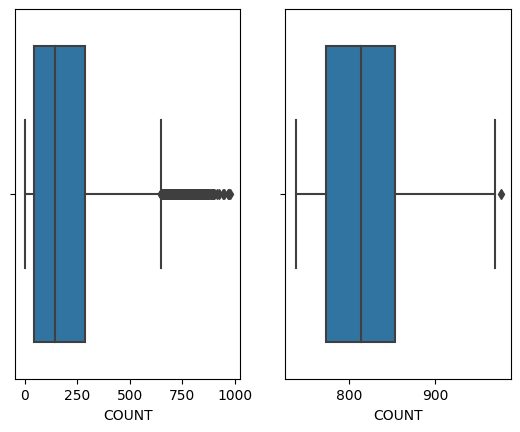

<Figure size 1000x600 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2)
sns.boxplot(x=df_table.to_pandas()['COUNT'], ax=axes[0])
sns.boxplot(x=df_without_outlier.to_pandas()['COUNT'], ax=axes[1])
plt.show()

### Correlation Analysis

* Section cover snowpark default option to calculate correlation score
* Also provides code snippet - by converting to pandas dataframe

In [ ]:
#Correlation
column_list = ["temp","atemp","casual","registered","humidity","windspeed","count"]
for i in range(0, len(column_list) - 1):
    for j in range( i + 1, len(column_list)):
        correlation = df_without_outlier.stat.corr(column_list[i], column_list[j])
        text = f"Correlation between {column_list[i]} and {column_list[j]} is {correlation}"
        print(text)

Correlation between temp and atemp is 0.8867069954671704
Correlation between temp and casual is 0.27439586514534764
Correlation between temp and registered is -0.11344260141130262
Correlation between temp and humidity is -0.22209903468060024
Correlation between temp and windspeed is -0.00282142677568521
Correlation between temp and count is 0.090925961635169
Correlation between atemp and casual is 0.2147513221104753
Correlation between atemp and registered is -0.0797053102397002
Correlation between atemp and humidity is -0.13160630310282323
Correlation between atemp and windspeed is -0.029077657967140087
Correlation between atemp and count is 0.08216007024581092
Correlation between casual and registered is -0.5753920258798173
Correlation between casual and humidity is -0.4627632395376554
Correlation between casual and windspeed is 0.016935938842728943
Correlation between casual and count is 0.13515372607423487
Correlation between registered and humidity is 0.230233618846889
Correlation

/var/folders/x_/qphvv4k55h5bf7zjkzl6_7n00000gp/T/ipykernel_5337/1652719965.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_without_outlier.to_pandas().corr()


<Axes: >

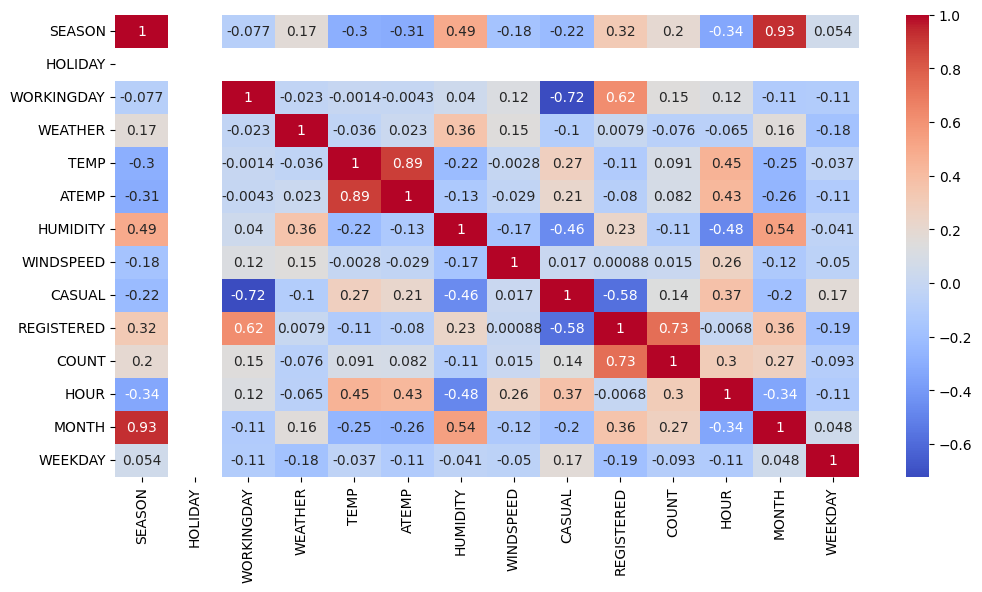

In [ ]:
corr_matrix = df_without_outlier.to_pandas().corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

### Filling 0's In windspeed -  Using Mean

* Code demostrates filling in missing values in Windspeed using Mean

In [ ]:
df = session.table("BSD_TRAINING")
df.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------
|"SEASON"  |"HOLIDAY"  |"WORKINGDAY"  |"WEATHER"  |"TEMP"  |"ATEMP"  |"HUMIDITY"  |"WINDSPEED"  |"CASUAL"  |"REGISTERED"  |"COUNT"  |"DATETIME"           |
-----------------------------------------------------------------------------------------------------------------------------------------------------------
|1         |0          |0             |1          |9.84    |14.395   |81          |0.0          |3         |13            |16       |2011-01-01 00:00:00  |
|1         |0          |0             |1          |9.02    |13.635   |80          |0.0          |8         |32            |40       |2011-01-01 01:00:00  |
|1         |0          |0             |1          |9.02    |13.635   |80          |0.0          |5         |27            |32       |2011-01-01 02:00:00  |
|1         |0          |0             |1          |9.84    |14.3

In [ ]:
print(f"Zero Values in windspeed column is {df_table.filter(df_table['WINDSPEED']==0).count()}")

In [ ]:
wind_speed_mean = df_train.select(mean("windspeed")).collect()[0][0]
print(wind_speed_mean)

12.7993954069447


In [ ]:
from snowflake.snowpark.functions import iff, avg
df_train = df_train.replace({0:wind_speed_mean}, subset=["windspeed"])
df_train.show()
df_train.write.mode("overwrite").save_as_table("model_data")

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"SEASON"  |"HOLIDAY"  |"WORKINGDAY"  |"WEATHER"  |"TEMP"  |"ATEMP"  |"HUMIDITY"  |"WINDSPEED"       |"CASUAL"  |"REGISTERED"  |"COUNT"  |"DATETIME"           |"HOUR"  |"MONTH"  |"DATE"      |"WEEKDAY"  |"YEAR"  |
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|1         |0          |0             |1          |9.84    |14.395   |81          |12.7993954069447  |3         |13            |16       |2011-01-01 00:00:00  |0       |1        |2011-01-01  |6          |2011    |
|1         |0          |0             |1          |9.02    |13.635   |80          |12.7993954069447  |8         |32            |40       |2011-0

### LINEAR REGRESSION MODEL - Using Sklearn
* Section demonstrates how traditionally ML models can be built & deployed using Stored Procedures
* Section was included to explain how SNOWPARK ML eases model building process in the following section

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics

def fit_linear_regressor(session:Session,
    table_name: str, feature_list: list, target_col: str, category_variable_list: list)->str:
    model = LinearRegression()
    df = session.table(table_name).to_pandas()

    for column in category_variable_list:
        df[column] = df[column].astype("category")
    y_lables_log = np.log1p(df[target_col])
    x_train, x_test, y_train, y_test = train_test_split(df, y_lables_log, test_size=0.3, random_state=42)

    test_df = session.create_dataframe(x_test)
    test_df.write.mode("overwrite").save_as_table("lr_test")

    model.fit(x_train[feature_list], y_train)
    joblib.dump(model, '/tmp/lr_model.joblib')

    # upload into my_internal_stage in Snowflake
    session.file.put(
        "/tmp/lr_model.joblib", "@snowpark_test_stage", auto_compress=False, overwrite=True
    )
    return 'Success'

session.sproc.register(
    func = fit_linear_regressor,
    is_permanent = True,
    name = 'fit_linear_regressor',
    replace = True,
    return_type = StringType(),
    stage_location = '@snowpark_test_stage',
    packages=[
            'snowflake-snowpark-python',
            'scikit-learn',
            'joblib',
            'numpy'
    ]
)

feature_list = ["SEASON", "HOLIDAY", "WORKINGDAY", "WEATHER", "WEEKDAY", "HOUR", "HUMIDITY", "MONTH", "TEMP", "YEAR", "ATEMP", "WINDSPEED"]
category_variable_list = ["HOUR","WEEKDAY","MONTH","SEASON","WEATHER","HOLIDAY","WORKINGDAY"]
table_name = "model_data"
target_column = "COUNT"
session.call("fit_linear_regressor", table_name, feature_list, target_column, category_variable_list)


The version of package 'scikit-learn' in the local environment is 1.3.2, which does not fit the criteria for the requirement 'scikit-learn'. Your UDF might not work when the package version is different between the server and your local environment.


'Success'

In [ ]:
session.clear_imports()
session.clear_packages()

session.add_import("@snowpark_test_stage/lr_model.joblib")

from snowflake.snowpark.types import PandasDataFrame, PandasSeries



def lr_predict_udf(df: PandasDataFrame[float, float, float, float, float, float, float, float, float, float, float, float]) -> PandasSeries[int]:
    import joblib, sys, os
    import pandas as pd

    import_dir = sys._xoptions.get("snowflake_import_directory")
    with open(os.path.join(import_dir, 'lr_model.joblib'), 'rb') as model_file:
        model = joblib.load(model_file)

    return model.predict(df)

session.udf.register(
    func = lr_predict_udf,
    is_permanent = True,
    name = 'lr_predict_udf',
    replace = True,
    stage_location = '@snowpark_test_stage',
    packages=[
            'snowflake-snowpark-python',
            'scikit-learn',
            'joblib']

)

The version of package 'scikit-learn' in the local environment is 1.3.2, which does not fit the criteria for the requirement 'scikit-learn'. Your UDF might not work when the package version is different between the server and your local environment.


In [ ]:
result_df = pd.DataFrame(session.sql(f'''
    select lr_predict_udf("SEASON", "HOLIDAY", "WORKINGDAY", "WEATHER", "WEEKDAY", "HOUR", "HUMIDITY", "MONTH", "TEMP", "YEAR", "ATEMP", "WINDSPEED" ) as predict
    from lr_test
''').collect())

from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import median_absolute_error, r2_score, mean_poisson_deviance, mean_gamma_deviance, mean_absolute_percentage_error, d2_absolute_error_score
from sklearn.metrics import d2_pinball_score, d2_tweedie_score


df_test = session.table("lr_test")
y_true = df_test.select(["COUNT"]).to_pandas()
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(np.log1p(y_true["COUNT"])),np.exp(result_df["PREDICT"]),False))
print ("Explained Variance Score For Linear Regression: ", explained_variance_score(np.exp(np.log1p(y_true["COUNT"])),np.exp(result_df["PREDICT"])))
print ("Max Error For Linear Regression: ", max_error(np.exp(np.log1p(y_true["COUNT"])),np.exp(result_df["PREDICT"])))
print ("MAE For Linear Regression: ", mean_absolute_error(np.exp(np.log1p(y_true["COUNT"])),np.exp(result_df["PREDICT"])))
print ("MSE For Linear Regression: ", mean_squared_error(np.exp(np.log1p(y_true["COUNT"])),np.exp(result_df["PREDICT"])))
print ("MSLE For Linear Regression: ", mean_squared_log_error(np.exp(np.log1p(y_true["COUNT"])),np.exp(result_df["PREDICT"])))
print ("MDAE For Linear Regression: ", median_absolute_error(np.exp(np.log1p(y_true["COUNT"])),np.exp(result_df["PREDICT"])))
print ("R2 For Linear Regression: ", r2_score(np.exp(np.log1p(y_true["COUNT"])),np.exp(result_df["PREDICT"])))
print ("Mean Poisson Deviance For Linear Regression: ", mean_poisson_deviance(np.exp(np.log1p(y_true["COUNT"])),np.exp(result_df["PREDICT"])))
print ("Mean Gamma Deviance For Linear Regression: ", mean_gamma_deviance(np.exp(np.log1p(y_true["COUNT"])),np.exp(result_df["PREDICT"])))
print ("Mean Absolute Percentage ErrorD For Linear Regression: ", mean_absolute_percentage_error(np.exp(np.log1p(y_true["COUNT"])),np.exp(result_df["PREDICT"])))
print ("D2 Absolute Error Score For Linear Regression: ", d2_absolute_error_score(np.exp(np.log1p(y_true["COUNT"])),np.exp(result_df["PREDICT"])))
print ("D2 Pinball Score For Linear Regression: ", d2_pinball_score(np.exp(np.log1p(y_true["COUNT"])),np.exp(result_df["PREDICT"])))
print ("D2 Tweedie Score For Linear Regression: ", d2_tweedie_score(np.exp(np.log1p(y_true["COUNT"])),np.exp(result_df["PREDICT"])))


RMSLE Value For Linear Regression:  1.7719994326466393
Explained Variance Score For Linear Regression:  -0.2893224918100574
Max Error For Linear Regression:  957.9142799713436
MAE For Linear Regression:  163.9351037877636
MSE For Linear Regression:  50997.89472978034
MSLE For Linear Regression:  3.1399819830748212
MDAE For Linear Regression:  121.91449359439045
R2 For Linear Regression:  -0.5672228900397749
Mean Poisson Deviance For Linear Regression:  415.5994683800633
Mean Gamma Deviance For Linear Regression:  7.635245106678112
Mean Absolute Percentage ErrorD For Linear Regression:  3.3175093348026414
D2 Absolute Error Score For Linear Regression:  -0.20020633706677038
D2 Pinball Score For Linear Regression:  -0.20020633706677038
D2 Tweedie Score For Linear Regression:  -0.5672227861252523


### LINEAR REGRESSION MODEL - Using SNOWPARK ML Package
* Section demonstates how SNOWPARKML library can be utilized to build ML models
* Also delineates how it closely resembles Sklearn coding paradigm

In [ ]:
df = session.table("RAW_DATA")
df = df.drop("DATETIME","DATE")
df.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"HOLIDAY"  |"WORKINGDAY"  |"TEMP"  |"ATEMP"  |"HUMIDITY"  |"WINDSPEED"       |"CASUAL"  |"REGISTERED"  |"COUNT"  |"HOUR"  |"MONTH"  |"WEEKDAY"  |"YEAR"  |"SEASON"  |"WEATHER"                                           |
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|0          |0             |9.84    |14.395   |81          |12.7993954069447  |3         |13            |16       |0       |1        |6          |2011    |Spring    | Clear + Few clouds + Partly cloudy + Partly cl...  |
|0          |0             |9.02    |13.635   |80          |12.7993954069447  |8         |32            |40       |1    

In [ ]:


CATEGORICAL_COLUMNS = ["SEASON", "WEATHER"]
CATEGORICAL_COLUMNS_OHE = ["SEASON_OE", "WEATHER_OE"]
MIN_MAX_COLUMNS = ["TEMP", "ATEMP"]
FEATURE_LIST = [ "HOLIDAY", "WORKINGDAY", "WEEKDAY", "HOUR", "HUMIDITY", "MONTH", "TEMP", "YEAR", "ATEMP", "WINDSPEED"]

LABEL_COLUMNS = ['COUNT']
OUTPUT_COLUMNS = ['PREDICTED_COUNT']

PIPELINE_FILE = 'preprocessing_pipeline.joblib'
preprocessing_pipeline = joblib.load(PIPELINE_FILE)

In [ ]:
# Split the data into train and test sets
bsd_train_df, bsd_test_df = df.random_split(weights=[0.7, 0.3], seed=0)

# Run the train and test sets through the Pipeline object we defined earlier
train_df = preprocessing_pipeline.fit(bsd_train_df).transform(bsd_train_df)
test_df = preprocessing_pipeline.transform(bsd_test_df)
train_df.show()
test_df.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"TEMP"               |"ATEMP"              |"SEASON_OE"  |"WEATHER_OE"  |"HOLIDAY"  |"WORKINGDAY"  |"HUMIDITY"  |"WINDSPEED"       |"CASUAL"  |"REGISTERED"  |"COUNT"  |"HOUR"  |"MONTH"  |"WEEKDAY"  |"YEAR"  |"SEASON"  |"WEATHER"                                           |
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|0.23404255319148934  |0.31034482758620685  |0.0          |0.0           |0          |0             |81          |12.7993954069447  |3         |13            |16       |0       |

In [ ]:
from snowflake.ml.modeling.linear_model import LinearRegression


regressor = LinearRegression(
    input_cols=CATEGORICAL_COLUMNS_OHE+FEATURE_LIST,
    label_cols=LABEL_COLUMNS,
    output_cols=OUTPUT_COLUMNS
)

# Train
regressor.fit(train_df)

# Predict
result = regressor.predict(test_df)
result.show()

The version of package 'scikit-learn' in the local environment is 1.3.2, which does not fit the criteria for the requirement 'scikit-learn==1.3.0'. Your UDF might not work when the package version is different between the server and your local environment.
/Users/paranthamansrinivasan/Environment/piperr/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
The version of package 'scikit-learn' in the local environment is 1.3.2, which does not fit the criteria for the requirement 'scikit-learn==1.3.0'. Your UDF might not work when the package version is different between the server and your local environment.


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"HOUR"  |"SEASON_OE"  |"WORKINGDAY"  |"MONTH"  |"TEMP"               |"CASUAL"  |"HOLIDAY"  |"WINDSPEED"       |"REGISTERED"  |"ATEMP"              |"COUNT"  |"WEEKDAY"  |"HUMIDITY"  |"SEASON"  |"YEAR"  |"WEATHER_OE"  |"WEATHER"                                           |"PREDICTED_COUNT"    |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|4       |0.0          |0             |1        |0.23404255319148934  |0         |0          |12.7993954069447  

In [ ]:

from snowflake.ml.modeling.metrics import mean_squared_error, explained_variance_score, mean_absolute_error, mean_absolute_percentage_error, d2_absolute_error_score, d2_pinball_score

mse = mean_squared_error(df=result, y_true_col_names="COUNT", y_pred_col_names="PREDICTED_COUNT")
evs = explained_variance_score(df=result, y_true_col_names="COUNT", y_pred_col_names="PREDICTED_COUNT")
mae = mean_absolute_error(df=result, y_true_col_names="COUNT", y_pred_col_names="PREDICTED_COUNT")
mape = mean_absolute_percentage_error(df=result, y_true_col_names="COUNT", y_pred_col_names="PREDICTED_COUNT")
d2aes = d2_absolute_error_score(df=result, y_true_col_names="COUNT", y_pred_col_names="PREDICTED_COUNT")
d2ps = d2_pinball_score(df=result, y_true_col_names="COUNT", y_pred_col_names="PREDICTED_COUNT")

print(f"Mean squared error: {mse}")
print(f"explained_variance_score: {evs}")
print(f"mean_absolute_error: {mae}")
print(f"mean_absolute_percentage_error: {mape}")
print(f"d2_absolute_error_score: {d2aes}")
print(f"d2_pinball_score: {d2ps}")


The version of package 'scikit-learn' in the local environment is 1.3.2, which does not fit the criteria for the requirement 'scikit-learn==1.3.*'. Your UDF might not work when the package version is different between the server and your local environment.
The version of package 'scikit-learn' in the local environment is 1.3.2, which does not fit the criteria for the requirement 'scikit-learn==1.3.*'. Your UDF might not work when the package version is different between the server and your local environment.
The version of package 'scikit-learn' in the local environment is 1.3.2, which does not fit the criteria for the requirement 'scikit-learn==1.3.*'. Your UDF might not work when the package version is different between the server and your local environment.


Mean squared error: 19391.524207020506
explained_variance_score: 0.40498512484914284
mean_absolute_error: 103.88982886764924
mean_absolute_percentage_error: 3.4279455496659987
d2_absolute_error_score: 0.24728138773207753
d2_pinball_score: 0.24728138773207753
